### Logistic Regression with a neural network mindset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


In [2]:
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('C://Users//dell//OneDrive//Documents//Amrita//Deep Learning//train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #  train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #  train set labels

    test_dataset = h5py.File('C://Users//dell//OneDrive//Documents//Amrita//Deep Learning//test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #  test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #  test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
#Loading the dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [4]:
train_set_x_orig.shape,train_set_y.shape

((209, 64, 64, 3), (1, 209))

In [5]:
type(train_set_x_orig)

numpy.ndarray

type of train_set_x_orig is <class 'numpy.ndarray'>(209, 64, 64, 3)
type of train_set_y is <class 'numpy.ndarray'>(1, 209)
type of classes is <class 'numpy.ndarray'>(2,)
[b'non-cat' b'cat']
non-cat
cat
y = [0], it's a 'non-cat' picture.


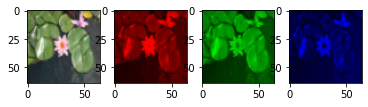

In [6]:
# Example of a picture
print("type of train_set_x_orig is "+ str(type(train_set_x_orig))+str(train_set_x_orig.shape))
print("type of train_set_y is "+ str(type(train_set_y))+str(train_set_y.shape))
print("type of classes is "+ str(type(classes))+str(classes.shape))
#print(train_set_x_orig.shape)
#print(train_set_y.shape)
print(classes)
print(classes[0].decode("utf-8"))
print(classes[1].decode("utf-8"))
index = 26

#print(train_set_x_orig[0,:,:,0].shape)
#print(train_set_x_orig[0].shape)
#print(train_set_x_orig[0][:][:][0].shape)

#print(train_set_y[:])

plt.subplot(141)
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

##### END: Slicing R G B channel from RGM Image #####
test_r=train_set_x_orig[index].copy()
test_g=train_set_x_orig[index].copy()
test_b=train_set_x_orig[index].copy()

test_r[:,:,1]=0
test_r[:,:,2]=0
test_g[:,:,0]=0
test_g[:,:,2]=0
test_b[:,:,0]=0
test_b[:,:,1]=0

plt.subplot(142)
plt.imshow(test_r)
plt.subplot(143)
plt.imshow(test_g)
plt.subplot(144)
plt.imshow(test_b)
plt.show()
##### END: Slicing R G B channel from RGM Image #####

##### START: Testing how slicing works #####
#test= train_set_x_orig[index].copy()
#print(test.shape)
#print(test[:,:,:].shape)
#print(test[0,:,:].shape)
#print(test[:,0,:].shape)
#print(test[:,:,0].shape)
#print("###############")
#print(test[:][:][:].shape)
#print(test[0][:][:].shape)
#print(test[:][0][:].shape)
#print(test[:][:][0].shape)
##### END: Testing how slicing works #####

In [7]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
height = train_set_x_orig.shape[1]
m_train,m_test,height

(209, 50, 64)

In [8]:
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(height))
print ("Each image is of size: (" + str(height) + ", " + str(height) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


### Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px  ∗  num_px  ∗  3, 1)

In [9]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
train_set_x_flatten.shape,test_set_x_flatten.shape

((12288, 209), (12288, 50))

In [10]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


### Standardize dataset

In [11]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

### Helper Functions

In [12]:
def sigmoid(z):
    res = 1/(1+np.exp(-z))
    return res

### Initializing Parameters

In [13]:
def initialize_with_zeroes(dim):
    w = np.zeros((dim,1))
    b=0
    return w,b

In [14]:
initialize_with_zeroes(2)

(array([[0.],
        [0.]]),
 0)

In [15]:
def propagate(w,b,X,Y):
    m=X.shape[1]
    # Forward Propogation
    A=sigmoid(np.dot(w.T,X)+b)
    cost = (-1 / m) * np.sum( Y * np.log(A) + (1-Y) * np.log(1-A))
    # Backward Propogation
    dw = (1/m) * np.dot(X,(A-Y).T)
    db = (1/m) * np.sum(A-Y)
    cost = np.squeeze(cost)
    grads ={'dw': dw,'db':db}
    return grads, cost

In [16]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [17]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs=[]
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        dw = grads['dw']
        db = grads['db']
        w = w-(learning_rate*dw)
        b = b-(learning_rate*db)
        if i%100==0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        params = {'w':w,'b':b}
        grads = {'dw':dw,'db':db}
    return params,grads,costs
    

In [18]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.001, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.90024365]
 [1.7607775 ]]
b = 1.9997701768238438
dw = [[0.99638701]
 [2.38847235]]
db = 0.003408886153159855


The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict()function. There are two steps to computing predictions:

1.Calculate  Ŷ =A=σ(wTX+b) 

2.Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [19]:
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X) + b) 
    for i in range(A.shape[1]):
        if (A[0,i] >= 0.5):
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    return Y_prediction

In [20]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [21]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    w, b = initialize_with_zeroes(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]
    

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [22]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


'cat'

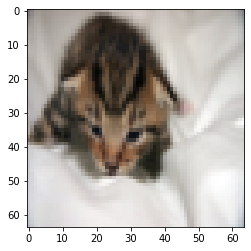

In [23]:
index = 1
plt.imshow(test_set_x[:,index].reshape((64, 64, 3)))
test_set_y[0,index]
classes[int(d["Y_prediction_test"][0,index])].decode('utf-8')

In [24]:
test_set_x.shape

(12288, 50)